In [3]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale

In [73]:
with open('../logs/m5/hid_20_exp_8_reg_norm/run_1/val_factors.pkl', 'rb') as fin:
    factors = pickle.load(fin)

In [74]:
with open('../logs/m5/hid_20_exp_8_norm/run_1/val_factors.pkl', 'rb') as fin:
    baseline_factors = pickle.load(fin)

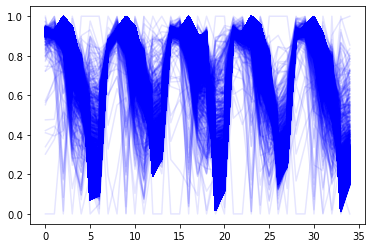

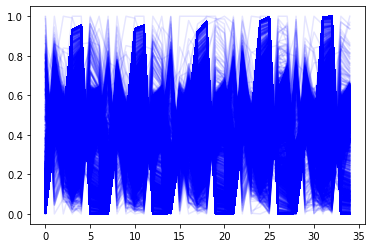

In [72]:
def plot_factors(factors):
    factors = np.concatenate(factors, axis=0)
    for i in range(factors.shape[1]):
        factor = factors[:, :, 5]
        factor = minmax_scale(factor, axis=1)
        plt.plot(factor[:, i], c='b', alpha=0.1)

plot_factors(factors)
plt.show()
plot_factors(baseline_factors)

In [12]:
def get_var(factors):
    factors = np.concatenate(factors, axis=0)
    edim = factors.shape[-1]
    stds = []
    for i in range(edim):
        factor = factors[:, :, i]
        factor = minmax_scale(factor, axis=1)
        std = np.std(factor, axis=1)
        std = np.mean(std)
        stds.append(std)
    return np.mean(stds)

def get_avg_var(expt_dir):
    val_vars = []
    test_vars = []
    for i in range(1, 11):
        with open(f'{expt_dir}/run_{i}/val_factors.pkl', 'rb') as fin:
            factors = pickle.load(fin)
        val_vars.append(get_var(factors))
        with open(f'{expt_dir}/run_{i}/test_factors.pkl', 'rb') as fin:
            factors = pickle.load(fin)
        test_vars.append(get_var(factors))
    return (np.mean(val_vars), np.std(val_vars)), (np.mean(test_vars), np.std(test_vars))

print('M5')
print(get_avg_var('../logs/m5/hid_20_exp_8_reg_norm/'))
print(get_avg_var('../logs/m5/hid_20_exp_8_norm/'))

print('Favorita')
print(get_avg_var('../logs/favorita/hid_20_exp_8_reg_norm/'))
print(get_avg_var('../logs/favorita/hid_20_exp_8_norm/'))

M5
((0.09495912, 0.0067066494), (0.09191121, 0.0070843436))
((0.11924173, 0.0133052105), (0.11652788, 0.012473473))
Favorita
((0.07879735, 0.0115646375), (0.07691909, 0.009180304))
((0.11680287, 0.018451504), (0.11186534, 0.014006231))


In [19]:
def get_kurt(factors):
    factors = np.concatenate(factors, axis=0)
    edim = factors.shape[-1]
    kurts = []
    for i in range(edim):
        factor = factors[:, :, i]
        kurt = np.std(factor, axis=1)
        kurt /= np.median(np.abs(factor))
        kurts.append(np.mean(kurt))
    return np.mean(kurts)

def get_avg_kurt(expt_dir):
    vals = []
    tests = []
    for i in range(1, 11):
        with open(f'{expt_dir}/run_{i}/val_factors.pkl', 'rb') as fin:
            factors = pickle.load(fin)
        vals.append(get_kurt(factors))
        with open(f'{expt_dir}/run_{i}/test_factors.pkl', 'rb') as fin:
            factors = pickle.load(fin)
        tests.append(get_kurt(factors))
    return np.mean(vals), np.mean(tests)

print('M5')
print(get_avg_kurt('../logs/m5/hid_20_exp_8_reg_norm/'))
print(get_avg_kurt('../logs/m5/hid_20_exp_8_norm/'))

print('Favorita')
print(get_avg_kurt('../logs/favorita/hid_20_exp_8_reg_norm/'))
print(get_avg_kurt('../logs/favorita/hid_20_exp_8_norm/'))

M5
(1.3049071, 1.2697833)
(1.6142161, 1.5082924)
Favorita
(5.3211274, 6.4506783)
(1.6069113, 1.7410736)
